In [95]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.special as spec
import scipy.integrate as integrate
import scipy.optimize as opt
import matplotlib.animation as anime
#data array

#burrell data
Experimental = np.array(
                #burrell
                [('burrell', 'C40+ optical', 99.99, 145, 1.168, 1), ('benhelm', 'C40+ optical', 99.925, 3000, 1.168, 1), ('myerson', 'C40+ optical', 99.991, 145, 1.168, 1),],

            #fidelity the average is for the two states (burrell)
            dtype=[('author', np.string_), ('ion', np.string_), ('fidelity', 'float'), ('readout time(us)', 'float'), ('coherence T1(s)', 'U8'), ('coherence T2(ms)','U8')])

print(Experimental)

[(b'', b'', 99.99 ,  145., '1.168', '1')
 (b'', b'', 99.925, 3000., '1.168', '1')
 (b'', b'', 99.991,  145., '1.168', '1')]


In [96]:
"Assuming the rates of |B〉→|D〉 and |D〉→|B〉 pumping are both zero and we have an ideal detector" 

#functions
def nc(RB, RD, tb):
    x = RB*tb/(np.log(1+(RB/RD)))
    return x

def Bmean(RB, RD, tb):
    x = (RB+RD)*tb
    return x

def Dmean(RD, tb):
    x = RD*tb
    return x

def Bo(N, Bmean):
    X = (np.power(Bmean,N)) * (np.exp(-1*Bmean)) / spec.factorial(N)
    return X

def Do(N, Dmean):
    X = (np.power(Dmean,N)) * (np.exp(-1*Dmean)) / spec.factorial(N)
    return X


#eB = np.sum(B0) #for n<nc
#eD = np.sum(D0) #for n>nc
#e = (eB+eD)/2

999.8115879636495
2.303


Text(0.5, 1.0, 'Count Probability with No Decay')

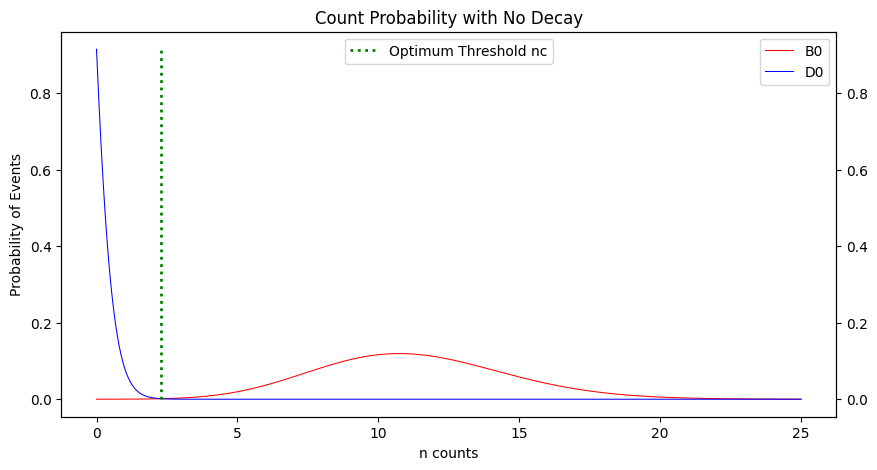

In [97]:
#Variables

#Burrell quoted
#RB = 55800 s−1
#RD = 442 s−1
#tb = 420 us = .00042

#nc = diferentiation counts

#n = counts
nMax = 25
#Bright state fluoresence rate
Rb = 55800
#Dark state fluoresence rate
Rd = 442
#bin time
tb = .0002
#tau decay time for Ca40
tau = 1.167

step = .001
N = np.arange(start=0,stop=nMax,step=step)

#Graphing
Bmean = Bmean(Rb,Rd,tb)
BM = np.full(np.int_(nMax/step),Bmean)
Dmean = Dmean(Rd,tb)
DM = np.full(np.int_(nMax/step),Dmean)

#n counts in tb from bright
B0 = Bo(N,BM)
#print(N)
#print(B0)
#n counts in tb from dark
D0 = Do(N,DM)

#B0 = B0/np.sum(B0)
#D0 = D0/np.sum(D0)

print(np.sum(B0))
#count threshold
nc = 0
minDiff = np.abs(B0[0]-D0[0])
for i, item in enumerate(B0):
    diff = np.abs(B0[i]-D0[i])
    #print(diff)
    if(i < np.size(B0)/2 and diff<minDiff):
        nc = i
        minDiff = diff
nc=nc*step
print(nc)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(N, B0, lw=0.75, c="r", label = "B0")
ax1.set_ylabel("Probability of Events")
ax1.set_xlabel("n counts")
ax1.plot(N, D0, lw=0.75, c="b", label = "D0")
ax3 = plt.twinx(ax1)
plt.vlines(nc, ymin=0, ymax=np.max(D0), colors='green', ls=':', lw=2, label='Optimum Threshold nc')
ax1.legend(loc = 'upper right')
ax3.legend(loc = 'upper center')
plt.title("Count Probability with No Decay")

Text(0.5, 1.0, 'Dark and Bright Errors without Decay')

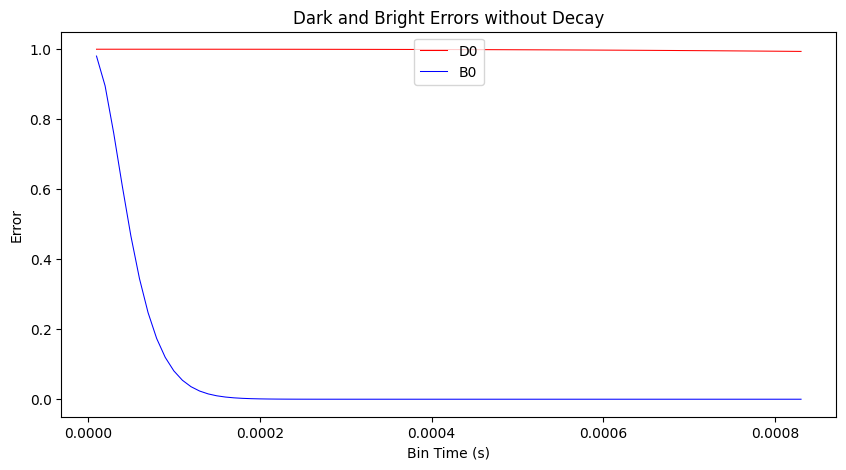

In [98]:
#Optimal Time vs Collection Efficiency w/o pumping discrete

#Integrate under the curves to find the error
#Plot error vs tb

Rb = 55800
Rd = 442
tb = .00042
N = np.arange(start=0,stop=nc,step= 1)

#nc to inf w/ D0
def ed(tb,N): 
    return np.sum((np.power(Rd*tb,N)) * (np.exp(-1*(Rd*tb))) / spec.factorial(N))
    
#0 to nc w/ B0
def eb(tb,N):
    return np.sum((np.power((Rb+Rd)*tb,N)) * (np.exp(-1*((Rb+Rd)*tb))) / spec.factorial(N))

tb = np.arange(start=.00001,stop=tb*2,step=.00001)



darkE = np.empty(0)
brightE = np.empty(0)

for i in tb:
    darkE = np.append(darkE, ed(i,N))
for i in tb:
    brightE = np.append(brightE, eb(i,N))

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(tb, darkE, lw=0.75, c="r", label = "D0")
ax1.set_ylabel("Error")
ax1.set_xlabel("Bin Time (s)")
ax1.plot(tb, brightE, lw=0.75, c="b", label = "B0")
ax1.legend(loc = 'upper center')
plt.title("Dark and Bright Errors without Decay")


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Text(0.5, 1.0, 'Dark and Bright Errors without Decay')

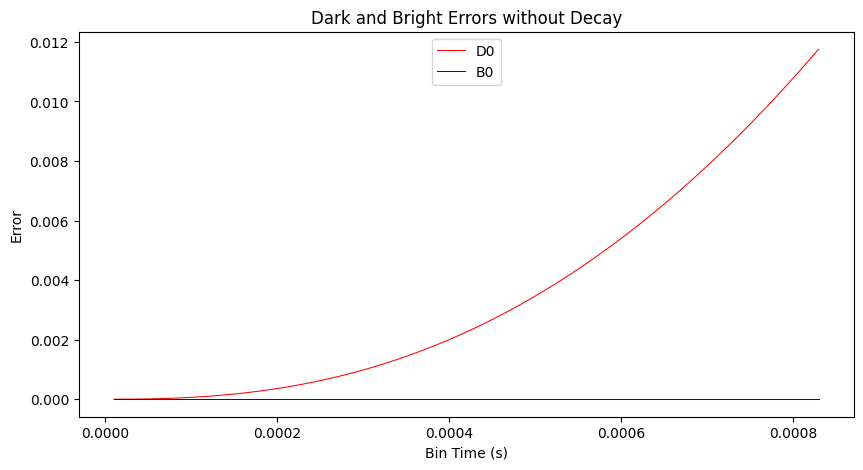

In [99]:
#Optimal Time vs Collection Efficiency w/o pumping

#Integrate under the curves to find the error
#Plot error vs tb

Rb = 55800
Rd = 442
tb = .00042

#nc to inf w/ D0
def ed(tb): 
    return (integrate.quad(D_integrand, nc, np.inf, args=(Rd, tb))[0])

def D_integrand(n, Rd, tb):
    return (np.power(Rd*tb,n)) * (np.exp(-1*(Rd*tb))) / spec.factorial(n)
    
#0 to nc w/ B0
def eb(tb):
    return (integrate.quad(B_integrand, 0, nc, args=(Rb, Rd, tb))[0])

def B_integrand(Rb, Rd, tb, n):
    return (np.power((Rb+Rd)*tb,n)) * (np.exp(-1*((Rb+Rd)*tb))) / spec.factorial(n)

tb = np.arange(start=.00001,stop=tb*2,step=.00001)


darkE = np.empty(0)
brightE = np.empty(0)

for i in tb:
    darkE = np.append(darkE, ed(i))
for i in tb:
    brightE = np.append(brightE, eb(i))

print(brightE)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(tb, darkE, lw=0.75, c="r", label = "D0")
ax1.set_ylabel("Error")
ax1.set_xlabel("Bin Time (s)")
ax1.plot(tb, brightE, lw=0.75, c="b", label = "B0")
ax1.legend(loc = 'upper center')
plt.title("Dark and Bright Errors without Decay")



In [100]:
'''In general, the rates for pumping between the qubit states will not be zero. For the
calcium optical qubit the |B〉→|D〉 pumping rate remains negligible (section 4.3.3), but
the rate of |D〉→|B〉pumping due to decay from the metastable D5/2 state is appreciable
at 1/τ where τ = 1.168(7) s is the average lifetime of the shelf state [138].
The count distribution B0(n) for trials prepared in the |B〉 state remains Poisson 
distributed with mean (RB + RD)tb, but the distribution for trials initially prepared in
the |D〉 state is modified to contain two terms:'''

'In general, the rates for pumping between the qubit states will not be zero. For the\ncalcium optical qubit the |B〉→|D〉 pumping rate remains negligible (section 4.3.3), but\nthe rate of |D〉→|B〉pumping due to decay from the metastable D5/2 state is appreciable\nat 1/τ where τ = 1.168(7) s is the average lifetime of the shelf state [138].\nThe count distribution B0(n) for trials prepared in the |B〉 state remains Poisson \ndistributed with mean (RB + RD)tb, but the distribution for trials initially prepared in\nthe |D〉 state is modified to contain two terms:'

In [101]:
'''The number of counts n recorded in tb when an ion decays at a time t is Poisson distributed with mean λ(t)'''
'''
#functions
def nc(RB, RD, tb):
    x = RB*tb/(np.log(1+(RB/RD)))
    return x

def Bmean(RB, RD, tb):
    x = (RB+RD)*tb
    return x

def Dmean(RD, tb):
    x = RD*tb
    return x

def Bo(N, Bmean):
    x = (np.power(Bmean,N)) * (np.exp(Bmean)) / spec.factorial(N)
    return x    

def X_integrand(N,l,g):
    return g*np.power(l,n)*np.exp(-l)/spec.factorial(n)

#return integrate.quad(B_integrand, 0, nc, args=(Rb, Rd, tb))

def Xo(N,l,g,RB,RD,tb):
    return integrate.quad(X_integrand, RD*tb, (RB+RD)*tb, args=(n,g))

def Do(n,L,g,RB,RD,tb,tau,Dmean):
    x = (np.e**(-tb/tau) * ((Dmean)**n) * (np.exp(Dmean)) / spec.factorial(n))# + Xo(n,L,g,RB,RD,tb)
    return x
'''

'\n#functions\ndef nc(RB, RD, tb):\n    x = RB*tb/(np.log(1+(RB/RD)))\n    return x\n\ndef Bmean(RB, RD, tb):\n    x = (RB+RD)*tb\n    return x\n\ndef Dmean(RD, tb):\n    x = RD*tb\n    return x\n\ndef Bo(N, Bmean):\n    x = (np.power(Bmean,N)) * (np.exp(Bmean)) / spec.factorial(N)\n    return x    \n\ndef X_integrand(N,l,g):\n    return g*np.power(l,n)*np.exp(-l)/spec.factorial(n)\n\n#return integrate.quad(B_integrand, 0, nc, args=(Rb, Rd, tb))\n\ndef Xo(N,l,g,RB,RD,tb):\n    return integrate.quad(X_integrand, RD*tb, (RB+RD)*tb, args=(n,g))\n\ndef Do(n,L,g,RB,RD,tb,tau,Dmean):\n    x = (np.e**(-tb/tau) * ((Dmean)**n) * (np.exp(Dmean)) / spec.factorial(n))# + Xo(n,L,g,RB,RD,tb)\n    return x\n'

In [102]:
#Variables
'''
#Burrell quoted
#RB = 55800 s−1
#RD = 442 s−1
#tb = 420 us = .00042
#n = counts
#nc = diferentiation counts

n = 50

#Bright state fluoresence rate
Rb = 55800
#Dark state fluoresence rate
Rd = 442
#bin time
tb = .00032

#tau is ?
tau = .01
# 0 <= t < tb time where ion decays
t = tb/2

l = Rd*tb+(Rb*(tb-t))

g = (1/(Rb*tb))*np.exp((l-((Rd+Rb)*tb)/(Rd*tau)))


step = .1
N = np.arange(start=0,stop=n,step=step)

#Graphing
Bmean = Bmean(Rb,Rd,tb)
BM = np.full(np.int_(n/step),Bmean)
Dmean = Dmean(Rd,tb)
DM = np.full(np.int_(n/step),Dmean)

#n counts in tb from bright
B0 = Bo(N,BM)

#n counts in tb from dark
D0 = Do(N,l,g,Rb,Rd,tb,tau,Dmean)

#count threshold
nc = nc(Rb, Rd, tb)
#minDiff = B0[0]-D0[0]
#nc = 0
#for i, item in enumerate(B0):
#    diff = B0[i]-D0[i]
#    if(diff<minDiff):
#        print(nc)
#        nc = i
#        minDiff = diff


#print(B0)
#print(D0)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(N, B0, lw=0.75, c="r", label = "B0")
ax1.set_ylabel("Number of Events")
ax1.set_xlabel("n counts")
ax2 = plt.twinx(ax1)
ax2.plot(N, D0, lw=0.75, c="b", label = "D0")
ax3 = plt.twinx(ax1)
plt.vlines(nc,ymin=0,ymax=np.max(D0), colors='green', ls=':', lw=2, label='Optimum Threshold nc')
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper left')
ax3.legend(loc = 'upper center')
plt.title("Count Probability in a Given State")
'''

'\n#Burrell quoted\n#RB = 55800 s−1\n#RD = 442 s−1\n#tb = 420 us = .00042\n#n = counts\n#nc = diferentiation counts\n\nn = 50\n\n#Bright state fluoresence rate\nRb = 55800\n#Dark state fluoresence rate\nRd = 442\n#bin time\ntb = .00032\n\n#tau is ?\ntau = .01\n# 0 <= t < tb time where ion decays\nt = tb/2\n\nl = Rd*tb+(Rb*(tb-t))\n\ng = (1/(Rb*tb))*np.exp((l-((Rd+Rb)*tb)/(Rd*tau)))\n\n\nstep = .1\nN = np.arange(start=0,stop=n,step=step)\n\n#Graphing\nBmean = Bmean(Rb,Rd,tb)\nBM = np.full(np.int_(n/step),Bmean)\nDmean = Dmean(Rd,tb)\nDM = np.full(np.int_(n/step),Dmean)\n\n#n counts in tb from bright\nB0 = Bo(N,BM)\n\n#n counts in tb from dark\nD0 = Do(N,l,g,Rb,Rd,tb,tau,Dmean)\n\n#count threshold\nnc = nc(Rb, Rd, tb)\n#minDiff = B0[0]-D0[0]\n#nc = 0\n#for i, item in enumerate(B0):\n#    diff = B0[i]-D0[i]\n#    if(diff<minDiff):\n#        print(nc)\n#        nc = i\n#        minDiff = diff\n\n\n#print(B0)\n#print(D0)\n\nfig = plt.figure(figsize=(10, 5))\nax1 = fig.add_subplot(1, 1, 1)\n

In [103]:
'''
#Optimal Time vs Collection Efficiency

#Integrate under the curves to find the error
#Plot error vs tb

Rb = 55800
Rd = 442

def D_integrand(n, Rd, tb):
    return (np.power(Rd*tb,n)) * (np.exp(Rd*tb)) / spec.factorial(n)
    
#nc to inf w/ D0
def ed(tb): 
    return integrate.quad(D_integrand, nc, np.inf, args=(Rd, tb))

def B_integrand(n, Rb, Rd, tb):
    return (np.power((Rb+Rd)*tb,n)) * (np.exp((Rb+Rd)*tb)) / spec.factorial(n)

#0 to nc w/ B0
def eb(tb):
    return integrate.quad(B_integrand, 0, nc, args=(Rb, Rd, tb))

#print(ed(.00032))
#print(eb(.00032))

tb = np.arange(start=0,stop=.001,step=.00001)
#print(tb)

darkE = np.empty(0)
brightE = np.empty(0)

for i in tb:
    darkE = np.append(darkE, ed(i)[0])
for i in tb:
    brightE = np.append(brightE, eb(i)[0])

#print(darkE)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(tb, darkE, lw=0.75, c="r", label = "D0")
ax1.set_ylabel("Error")
ax1.set_xlabel("Bin Time (s)")
ax2 = plt.twinx(ax1)
ax2.plot(tb, brightE, lw=0.75, c="b", label = "B0")
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper left')

plt.title("Dark and Bright Errors")
'''


'\n#Optimal Time vs Collection Efficiency\n\n#Integrate under the curves to find the error\n#Plot error vs tb\n\nRb = 55800\nRd = 442\n\ndef D_integrand(n, Rd, tb):\n    return (np.power(Rd*tb,n)) * (np.exp(Rd*tb)) / spec.factorial(n)\n    \n#nc to inf w/ D0\ndef ed(tb): \n    return integrate.quad(D_integrand, nc, np.inf, args=(Rd, tb))\n\ndef B_integrand(n, Rb, Rd, tb):\n    return (np.power((Rb+Rd)*tb,n)) * (np.exp((Rb+Rd)*tb)) / spec.factorial(n)\n\n#0 to nc w/ B0\ndef eb(tb):\n    return integrate.quad(B_integrand, 0, nc, args=(Rb, Rd, tb))\n\n#print(ed(.00032))\n#print(eb(.00032))\n\ntb = np.arange(start=0,stop=.001,step=.00001)\n#print(tb)\n\ndarkE = np.empty(0)\nbrightE = np.empty(0)\n\nfor i in tb:\n    darkE = np.append(darkE, ed(i)[0])\nfor i in tb:\n    brightE = np.append(brightE, eb(i)[0])\n\n#print(darkE)\n\nfig = plt.figure(figsize=(10, 5))\nax1 = fig.add_subplot(1, 1, 1)\nax1.plot(tb, darkE, lw=0.75, c="r", label = "D0")\nax1.set_ylabel("Error")\nax1.set_xlabel("Bin Ti